# OpenCVを使用する場合

In [1]:
import cv2,os
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
def Normalize(img):
    out = np.zeros(img.shape).astype('uint8')
    cv2.normalize(img,out,alpha=0,beta=255, norm_type=cv2.NORM_MINMAX)
    return out

In [6]:
def EqualHist_CV(img):
    #img = cv2.imread(sys.argv[1])
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    #cv2.imshow('equalize', img)
    return img


In [7]:
def addGaussianNoise(img):
    mean = 0
    sigma = 15
    gauss = np.random.normal(mean,sigma,img.shape)
    gauss = gauss.reshape(img.shape)
    out = img + gauss
    out = np.minimum(out,255) #2つの配列の各要素のうち最小値を取得。欠損値 NaN優先。
    out = np.maximum(out,0)
    out = out.astype('uint8')
    return out

In [8]:
def addSaltPepperNoise(img):
    proportion_of_s_p = 0.5  # ノイズの白黒の割合
    amount = 0.04           # ノイズの量
    out = img.copy()
    
    # Salt mode
    num_salt = np.ceil(amount*img.size*proportion_of_s_p) # ノイズの数
    coords = [np.random.randint(0,i-1, int(num_salt)) for i in img.shape[:-1]] # :-1は最後の1つ手前までという意味。 (row,column)
    out[coords] = (255,255,255)
    
    # Pepper mode
    num_pepper = np.ceil(amount * img.size * (1. - proportion_of_s_p))
    coords = [np.random.randint(0,i-1, int(num_pepper)) for i in img.shape[:-1]]
    out[coords] = (0,0,0)
    
    return out

In [9]:
def addGamma(img, gamma):
    # ルックアップテーブル作成
    LUT_G = np.arange(256, dtype= 'uint8')
    
    # ガンマ変換LUT作成
    for i in range(256):
        LUT_G[i] = 255 * pow(float(i)/255, 1.0/gamma)
    
    out = cv2.LUT(img, LUT_G)
    return out

In [10]:
def LowHigh_contrast(img):
    #ルックアップテーブル作成
    min_table = 50
    max_table = 205
    diff_table = max_table + min_table
    LUT_HC = np.arange(256, dtype='uint8')
    LUT_LC = np.arange(256, dtype='uint8')
    
    # ハイコントラストLUT作成
    for i in range(min_table):
        LUT_HC[i] = 0
    for i in range(min_table, max_table):
        LUT_HC[i] = 255 * (i-min_table) / diff_table
    for i in range(max_table, 255):
        LUT_HC[i] = 255
    out1 = cv2.LUT(img, LUT_HC)
    
    # ローコントラストLUT作成
    for i in range(256):
        LUT_LC[i] = min_table + i * (diff_table) /255
    out2 = cv2.LUT(img, LUT_LC)
    
    return out1, out2

In [11]:
#カーネル内の全画素の画素値の平均をとることで画像をぼかす
def Smoothing(img):
    average_square = (8,8)
    out = cv2.blur(img, average_square)
    return out

In [3]:
origin_img = os.path.join("effect")
arg_img = os.path.join("arg_effect")
os.makedirs(arg_img, exist_ok=True)

In [13]:
img_file = os.listdir(origin_img)

for path in img_file:
    img = cv2.imread(os.path.join(origin_img,path))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    norm_img = Normalize(img)
    hist_img = EqualHist_CV(img)
    noise_img = addSaltPepperNoise(img)
    s_img = Smoothing(img)
    g1_img = addGamma(img,gamma=0.75)
    g2_img = addGamma(img,gamma=1.5)
    [c1_img, c2_img] = LowHigh_contrast(img)
    
    cv2.imwrite(os.path.join(arg_img,"norm_"+path),norm_img)
    cv2.imwrite(os.path.join(arg_img,"hist_"+path),hist_img)
    cv2.imwrite(os.path.join(arg_img,"noise_"+path),noise_img)
    cv2.imwrite(os.path.join(arg_img,"smooth_"+path),s_img)
    cv2.imwrite(os.path.join(arg_img,"gamma1_"+path),g1_img)
    cv2.imwrite(os.path.join(arg_img,"gamma2_"+path),g2_img)
    cv2.imwrite(os.path.join(arg_img,"LowContrast_"+path),c1_img)
    cv2.imwrite(os.path.join(arg_img,"HighContrast_"+path),c2_img)

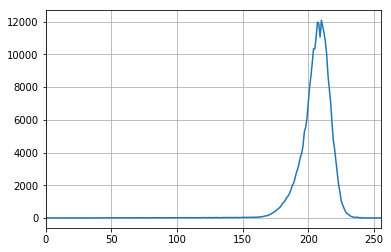

In [36]:
n_img = cv2.imread(os.path.join(arg_img,"norm_Cra001.JPG"))
n_img = cv2.cvtColor(n_img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(n_img, cv2.COLOR_RGB2GRAY)
hist,bins = np.histogram(gray.ravel(),256,[0,256])

plt.xlim(0,255)
plt.plot(hist)
plt.grid()
plt.show()

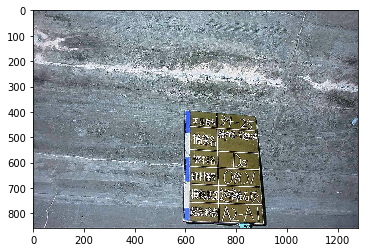

In [31]:
from PIL import Image
pil_img = Image.open(os.path.join(arg_img,"norm_Efee127_add.jpg"))
plt.imshow(pil_img)

# Pillowを使用する場合

In [14]:
from PIL import Image, ImageOps, ImageFilter
import os
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [15]:
origin_img = os.path.join("effect")
arg_img = os.path.join("arg_effect")
os.makedirs(arg_img, exist_ok=True)

### cf. 左右反転を行う

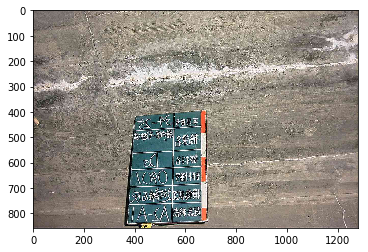

In [3]:
img = Image.open(os.path.join(origin_img,"Efee127_add.jpg"))
millor_img = ImageOps.mirror(img)    # 左右反転
plt.imshow(millor_img)

In [16]:
from itertools import product
from random import random
from random import gauss

class Noise:
    def __init__(self, input_image):
        self.input_image = input_image
        self.input_pix = self.input_image.load()
        self.w, self.h = self.input_image.size

    def saltpepper(self, salt=0.05, pepper=0.05):
        output_image = Image.new("RGB", self.input_image.size)
        output_pix = output_image.load()

        for x, y in product(*map(range, (self.w, self.h))):
            r = random()
            if r < salt:
                output_pix[x, y] = (255, 255, 255)
            elif r > 1 - pepper:
                output_pix[x, y] = (  0,   0,   0)
            else:
                output_pix[x, y] = self.input_pix[x, y]
        return output_image

    def gaussian(self, amp=10):
        output_image = Image.new("RGB", self.input_image.size)
        output_pix = output_image.load()
        for x, y in product(*map(range, (self.w, self.h))):
            noised_colors = map(lambda x: gauss(x, amp), self.input_pix[x, y])
            noised_colors = map(lambda x: max(0, x), map(lambda x: min(255, x), noised_colors))
            noised_colors = tuple(map(int, noised_colors))
            output_pix[x, y] = noised_colors
        return output_image


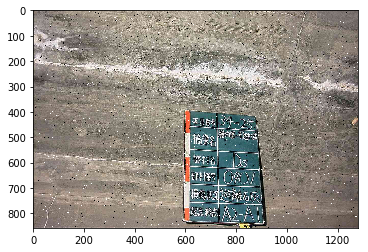

In [72]:
img = Image.open(os.path.join(origin_img,"Efee127_add.jpg"))
n_img = Noise(img)
noise_img = n_img.saltpepper(salt=0.004,pepper=0.004)
plt.imshow(noise_img)


### 明るさの変更

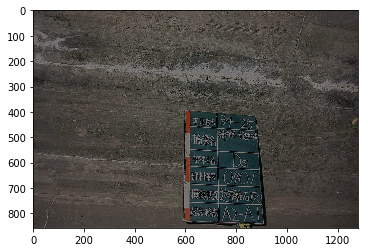

In [16]:
img = Image.open(os.path.join(origin_img,"Efee127_add.jpg"))
l_img = img.point(lambda x: x * 0.5)    # 1/2倍に暗くする
plt.imshow(l_img)

### ヒストグラム均等化

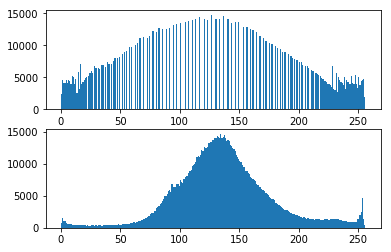

In [32]:
# 画像の読み込み & グレースケールに変換
img = Image.open(os.path.join(origin_img,"Efee127_add.jpg")).convert('L')


# 上段の画像の表示設定
plt.subplot(2, 1, 1) # 引数はそれぞれ、全体の行数、全体の列数、設定対象のIndex
h_img = ImageOps.equalize(img)
a1 = np.array(h_img)
plt.hist(a1.flatten(), bins=np.arange(256 + 1))

# 下段のヒストグラムの設定
plt.subplot(2, 1, 2)
a = np.array(img)
plt.hist(a.flatten(), bins=np.arange(256 + 1)) #階級の幅を1としてヒストグラムを出す。

# 図表の表示
plt.show()


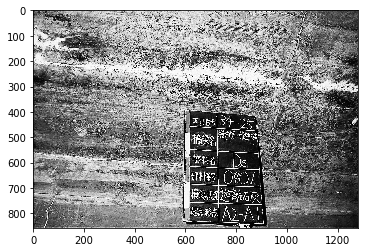

In [34]:
h_img = ImageOps.equalize(img)
plt.imshow(h_img)

### [輝度だけヒストグラム平坦化](https://qiita.com/yoya/items/a11085f90f555b887cf6)
輝度と色味を分ける色空間 YCbCr (Y:輝度、Cb:青の色差、Cr:赤の色差) を利用するとよいです。  
色味の問題は、RGB を一旦この YCbCr に変換して Y だけヒストグラム平坦化すれば解決します。

In [17]:
def equalHist(img):
    img = img.convert("YCbCr")
    yy, cb, cr = img.split()

    yy = ImageOps.equalize(yy);
    img = Image.merge("YCbCr", (yy, cb, cr))

    img = img.convert("RGB")
    return img


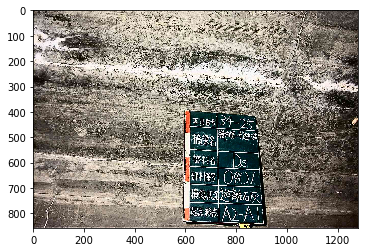

In [46]:
img = Image.open(os.path.join(origin_img,"Efee127_add.jpg"))
e_img = equalHist(img)
plt.imshow(e_img)

### ガンマ変換

In [18]:
def gamma_table(gamma_r, gamma_g, gamma_b, gain_r=1.0, gain_g=1.0, gain_b=1.0):
    r_tbl = [min(255, int((x / 255.) ** (1. / gamma_r) * gain_r * 255.)) for x in range(256)]
    g_tbl = [min(255, int((x / 255.) ** (1. / gamma_g) * gain_g * 255.)) for x in range(256)]
    b_tbl = [min(255, int((x / 255.) ** (1. / gamma_b) * gain_b * 255.)) for x in range(256)]
    return r_tbl + g_tbl + b_tbl


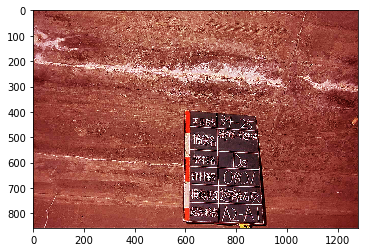

In [25]:
g_img = img.point(gamma_table(1.2, 0.5, 0.5))
plt.imshow(g_img)

### 画像をぼかす

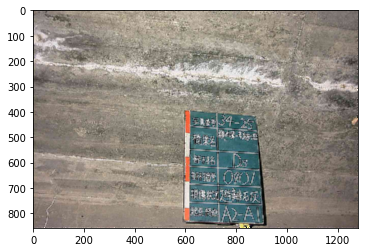

In [37]:
blur_img = img.filter(ImageFilter.BLUR)
plt.imshow(blur_img)

## 画像の水増し実施
- ヒストグラム均等化
- ゴマ塩雑音付加
- 画像をぼかす
- ガンマ変換 × 2
- 画像の明暗の変更 × 2

計　7種類

In [20]:
img_file = os.listdir(origin_img)

for path in img_file:
    img = Image.open(os.path.join(origin_img,path))
    #norm_img = ImageOps.equalize(img)        #ヒストグラム均等化
    hist_img = equalHist(img)                 #輝度だけヒストグラム平坦化
    noise_img = Noise(img).saltpepper(salt=0.01,pepper=0.01) # ゴマ塩雑音付加
    blur_img = img.filter(ImageFilter.BLUR)        # 画像をぼかす
    g1_img = img.point(gamma_table(0.5, 0.5, 0.5)) # ガンマ変換
    g2_img = img.point(gamma_table(1.5, 1.5, 1.5))
    l1_img = img.point(lambda x: x * 1.5)    # 1.5倍明るくする
    l2_img = img.point(lambda x: x * 0.5)    # 1/2に暗くする
    
    hist_img.save(os.path.join(arg_img,"EqualHist_"+path))
    noise_img.save(os.path.join(arg_img,"noise_"+path))
    blur_img.save(os.path.join(arg_img,"Blur_"+ path))
    g1_img.save(os.path.join(arg_img, "Gamma1_"+path))
    g2_img.save(os.path.join(arg_img, "Gamma2_"+path))
    l1_img.save(os.path.join(arg_img,"HLight_"+path))
    l2_img.save(os.path.join(arg_img,"LLight_"+path))